<!-- @format -->

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<!-- @format -->

# **Space X Falcon 9 First Stage Landing Prediction**


<!-- @format -->

## Assignment: Machine Learning Prediction


<!-- @format -->

Estimated time needed: **60** minutes


<!-- @format -->

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.


<!-- @format -->

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


<!-- @format -->

Several examples of an unsuccessful landing are shown here:


<!-- @format -->

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


<!-- @format -->

Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


<!-- @format -->

## Objectives


<!-- @format -->

Perform exploratory Data Analysis and determine Training Labels

- create a column for the class
- Standardize the data
- Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

- Find the method performs best using test data


<!-- @format -->

## Import Libraries and Define Auxiliary Functions


In [1]:
# # pip install -q snowballstemmer
# !pip install subprocess
# import subprocess
# packages_to_install = ["piplite"]

# for package in packages_to_install:
#     subprocess.run(["pip", "install", package])

<!-- @format -->

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Preprocessing allows us to standarsize our data
from sklearn import preprocessing

# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

# Support Vector Machine classification algorithm
from sklearn.svm import SVC

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<!-- @format -->

This function is to plot the confusion matrix.


In [16]:
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    # annot=True to annotate cells
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(["did not land", "land"])
    ax.yaxis.set_ticklabels(["did not land", "landed"])
    plt.show()

<!-- @format -->

## Load the dataframe


<!-- @format -->

Load the data


In [3]:
# from js import fetch
# import io

# URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp1 = await fetch(URL1)
# text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
# data = pd.read_csv(text1)


def read_csv2df(url):
    import requests
    import io

    resp = requests.get(url)
    text = io.StringIO(resp.text)
    data = pd.read_csv(text)
    return data


URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
data = read_csv2df(URL1)

print(data.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [4]:
X = read_csv2df(URL2)
print(X)

    FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0            1.0   6104.959412      1.0    1.0          0.0          0.0   
1            2.0    525.000000      1.0    1.0          0.0          0.0   
2            3.0    677.000000      1.0    1.0          0.0          0.0   
3            4.0    500.000000      1.0    1.0          0.0          0.0   
4            5.0   3170.000000      1.0    1.0          0.0          0.0   
..           ...           ...      ...    ...          ...          ...   
85          86.0  15400.000000      2.0    5.0          2.0          0.0   
86          87.0  15400.000000      3.0    5.0          2.0          0.0   
87          88.0  15400.000000      6.0    5.0          5.0          0.0   
88          89.0  15400.000000      3.0    5.0          2.0          0.0   
89          90.0   3681.000000      1.0    5.0          0.0          0.0   

    Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0         0.0     

<!-- @format -->

## TASK 1


<!-- @format -->

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code> then
assign it to the variable <code>Y</code>,make sure the output is a Pandas series (only one bracket df\['name of column']).


In [5]:
Y = data["Class"].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

<!-- @format -->

## TASK 2


<!-- @format -->

Standardize the data in <code>X</code> then reassign it to the variable <code>X</code> using the transform provided below.


In [6]:
# students get this
scaler = preprocessing.StandardScaler()
scaler.fit(X)
data_norm = scaler.transform(X)
data_norm.shape

(90, 83)

<!-- @format -->

We split the data into training and testing data using the function <code>train_test_split</code>. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


<!-- @format -->

## TASK 3


<!-- @format -->

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<!-- @format -->

<code>X_train, X_test, Y_train, Y_test</code>


In [7]:
# Allows us to split our data into training and testing data
# from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train)
print(Y_train)

    FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
10          11.0   2216.000000      1.0    1.0          0.0          0.0   
89          90.0   3681.000000      1.0    5.0          0.0          0.0   
78          79.0   9525.000000      1.0    5.0          2.0          0.0   
21          22.0   3100.000000      1.0    2.0          1.0          0.0   
80          81.0  15400.000000      3.0    5.0          3.0          0.0   
..           ...           ...      ...    ...          ...          ...   
29          30.0   6104.959412      1.0    3.0          1.0          0.0   
41          42.0   2205.000000      2.0    3.0          1.0          0.0   
6            7.0   2296.000000      1.0    1.0          0.0          0.0   
12          13.0    570.000000      1.0    1.0          0.0          1.0   
22          23.0   2257.000000      1.0    2.0          1.0          0.0   

    Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
10        0.0     

<!-- @format -->

we can see we only have 18 test samples.


In [8]:
Y_test.shape

(23,)

<!-- @format -->

## TASK 4


<!-- @format -->

Create a logistic regression object then create a GridSearchCV object <code>logreg_cv</code> with cv = 10. Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [9]:
parameters = {"C": [0.01, 0.1, 1], "penalty": ["l2"], "solver": ["lbfgs"]}

In [10]:
X_train, Y_train

(    FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
 10          11.0   2216.000000      1.0    1.0          0.0          0.0   
 89          90.0   3681.000000      1.0    5.0          0.0          0.0   
 78          79.0   9525.000000      1.0    5.0          2.0          0.0   
 21          22.0   3100.000000      1.0    2.0          1.0          0.0   
 80          81.0  15400.000000      3.0    5.0          3.0          0.0   
 ..           ...           ...      ...    ...          ...          ...   
 29          30.0   6104.959412      1.0    3.0          1.0          0.0   
 41          42.0   2205.000000      2.0    3.0          1.0          0.0   
 6            7.0   2296.000000      1.0    1.0          0.0          0.0   
 12          13.0    570.000000      1.0    1.0          0.0          1.0   
 22          23.0   2257.000000      1.0    2.0          1.0          0.0   
 
     Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
 10 

In [11]:
# Allows us to test parameters of classification algorithms and find the best one
# from sklearn.model_selection import GridSearchCV
# Support Vector Machine classification algorithm
from sklearn import svm


# Define the hyperparameters and their possible values for GridSearchCV
parameters = {
    "C": [0.01, 0.1, 1],
    "penalty": ["l2"],
    "solver": ["lbfgs"],
}  # l1 lasso l2 ridge
lr = LogisticRegression()

# Create the GridSearchCV object
logreg_cv = GridSearchCV(
    lr, parameters, refit=True
)  # svc = svm.SVC() # here using lr instead of svc.
logreg_cv.fit(X_train, Y_train)

/Users/macjianfeng/miniforge3/envs/spyder-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/macjianfeng/miniforge3/envs/spyder-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

<!-- @format -->

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [17]:
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

accuracy_logreg = logreg_cv.best_score_

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7890109890109891


<!-- @format -->

## TASK 5


<!-- @format -->

Calculate the accuracy on the test data using the method <code>score</code>:


In [18]:
# Use the best model to make predictions on the test set
best_model = logreg_cv.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy = best_model.score(X_test, Y_test)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8260869565217391


<!-- @format -->

Lets look at the confusion matrix:


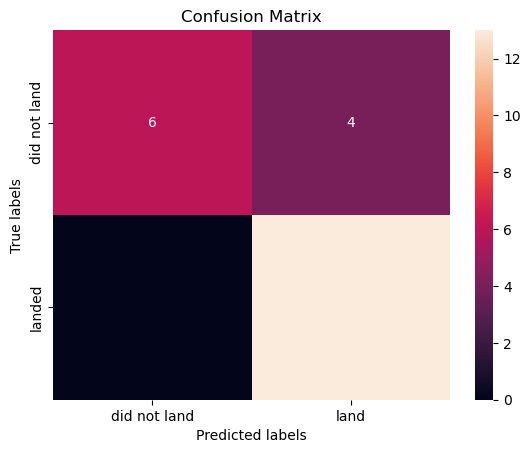

In [19]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

<!-- @format -->

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.


<!-- @format -->

## TASK 6


<!-- @format -->

Create a support vector machine object then create a <code>GridSearchCV</code> object <code>svm_cv</code> with cv - 10. Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [16]:
from sklearn import svm

svc = svm.SVC()

# Define the hyperparameters and their possible values for GridSearchCV
parameters = {
    "kernel": ("linear", "rbf", "poly", "rbf", "sigmoid"),
    "C": np.logspace(-3, 3, 5),
    "gamma": np.logspace(-3, 3, 5),
}
# Create the GridSearchCV object
svm_cv = GridSearchCV(
    svc,
    parameters,
    cv=10,
)  # svc = svm.SVC() # here using lr instead of svc.
svm_cv.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

<!-- @format -->

## TASK 7


<!-- @format -->

Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
# Use the best model to make predictions on the test set
best_model_svm_cv = svm_cv.best_estimator_
y_pred = best_model_svm_cv.predict(X_test)

# Evaluate the model on the test set
accuracy = best_model_svm_cv.score(X_test, Y_test)
print("Accuracy on Test Set:", accuracy)

<!-- @format -->

We can plot the confusion matrix


In [ ]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

<!-- @format -->

## TASK 8


<!-- @format -->

Create a decision tree classifier object then create a <code>GridSearchCV</code> object <code>tree_cv</code> with cv = 10. Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [1]:
parameters = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [2 * n for n in range(1, 10)],
    "max_features": ["auto", "sqrt"],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10],
}
from sklearn import tree

# Decision Tree model
# tree = DecisionTreeClassifier()
dt_model = tree.DecisionTreeClassifier()
tree_cv = GridSearchCV(dt_model, parameters, cv=10, scoring="accuracy")
tree_cv.fit(X_train, Y_train)

# Get the best hyperparameters for Decision Tree
best_dt_params = tree_cv.best_params_
print("Best Decision Tree Hyperparameters:", best_dt_params)
# Use the best Decision Tree model to make predictions on the test set
best_dt_model = tree_cv.best_estimator_
# Evaluate the Decision Tree model on the test set
dt_accuracy = best_dt_model.score(X_test, Y_test)
print("Decision Tree Accuracy on Test Set:", dt_accuracy)
print("tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)
# plot the confusion matrix
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

NameError: name 'GridSearchCV' is not defined

<!-- @format -->

## TASK 10


<!-- @format -->

Create a k nearest neighbors object then create a <code>GridSearchCV</code> object <code>knn_cv</code> with cv = 10. Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Best Decision Tree Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2}
Decision Tree Accuracy on Test Set: 0.34782608695652173
tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2}
accuracy : 0.6166666666666666


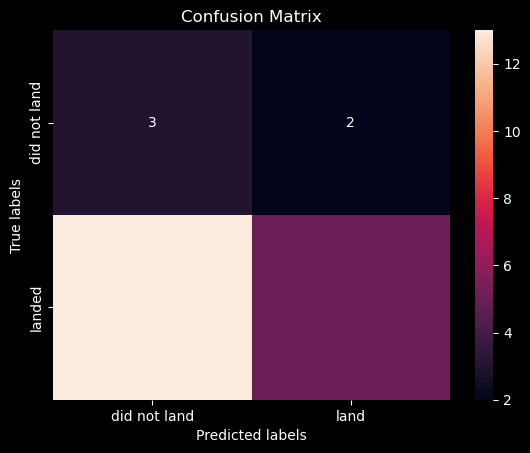

In [ ]:
parameters = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
}
import sklearn

KNN = sklearn.neighbors.KNeighborsClassifier()

# Decision K-nearest neighbors model
knn_cv = GridSearchCV(KNN, parameters, cv=10, scoring="accuracy")
knn_cv.fit(X_train, Y_train)

# Get the best hyperparameters for Decision Tree
best_dt_params = knn_cv.best_params_
print("Best Decision Tree Hyperparameters:", best_dt_params)
# Use the best Decision Tree model to make predictions on the test set
best_dt_model = knn_cv.best_estimator_
# Evaluate the Decision Tree model on the test set
dt_accuracy = best_dt_model.score(X_test, Y_test)
print("Decision Tree Accuracy on Test Set:", dt_accuracy)
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)
# plot the confusion matrix
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

<!-- @format -->

## TASK 12


<!-- @format -->

Find the method performs best:


<!-- @format -->

## Authors


<!-- @format -->

[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


<!-- @format -->

## Change Log


<!-- @format -->

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                       |
| ----------------- | ------- | --------------- | ---------------------------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite |


<!-- @format -->

### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
